# Morphological image processing

Morphological image processing (MIP) is a group of non-linear operations that correlate to the shape or morphology of features in an image. The morphological operations depend only on the comparative arrangement of pixel values, not their numerical values. They are particularly suitable for processing binary images.

## Importing libraries and loading image

In [1]:
# Importing modules from skimage to read and display images
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('skimage version:', skimage.__version__)

skimage version: 0.24.0


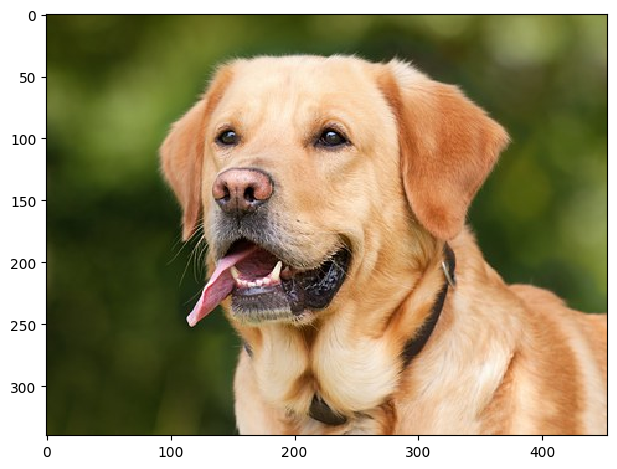

In [2]:
# Read the image
image = imread('images/dog.jpg')

# Load the image
imshow(image)

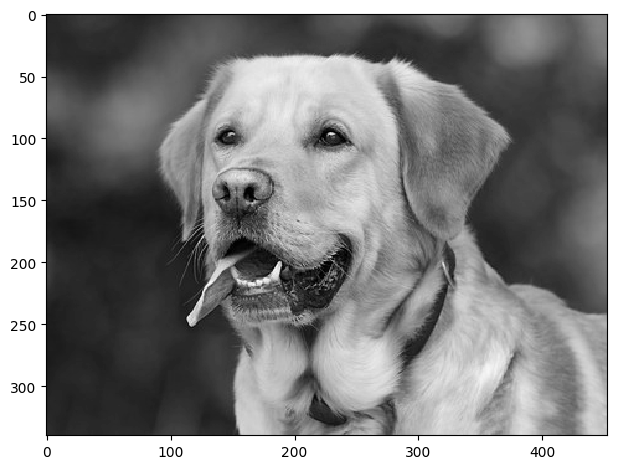

In [3]:
# Converting the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# See the image
imshow(gray_image)

## Morphological techniques

### Image Dilation

The value of the output pixel is the maximum value of all pixels in the neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1. Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.

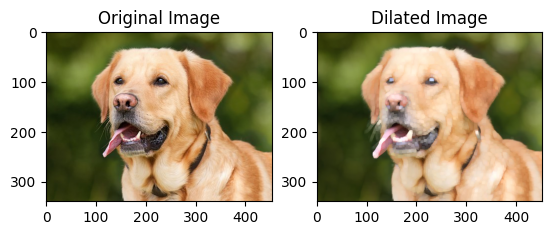

In [6]:
kernel = np.ones((5, 5), np.uint8)
image1 = cv2.dilate(image, kernel)

titles = ['Original Image', 'Dilated Image']
images = [image, image1]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i])
 
plt.show()

### Image Erosion

The value of the output pixel is the minimum value of all pixels in the neighborhood. In a binary image, a pixel is set to 0 if any of the neighboring pixels have the value 0. Morphological erosion removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller.

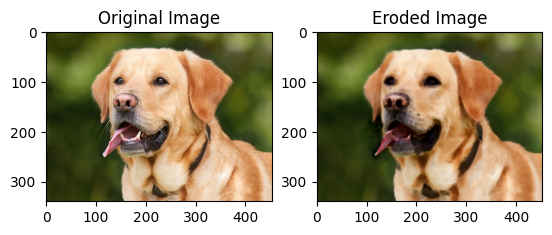

In [8]:
kernel = np.ones((5, 5), np.uint8)
image1 = cv2.erode(image, kernel)

titles = ['Original Image', 'Eroded Image']
images = [image, image1]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i])
 
plt.show()

### Image opening, closing and morphological gradient

a morphological gradient is the difference between the dilation and the erosion of a given image. It is an image where each pixel value (typically non-negative) indicates the contrast intensity in the close neighborhood of that pixel. **Opening and Closing** are dual operations used in Digital Image Processing for restoring an eroded image. 

Opening is generally used to restore or recover the original image to the maximum possible extent. Closing is generally used to smoother the contour of the distorted image and fuse back the narrow breaks and long thin gulfs. Closing is also used for getting rid of the small holes of the obtained image. The combination of Opening and Closing is generally used to clean up artifacts in the segmented image before using the image for digital analysis.

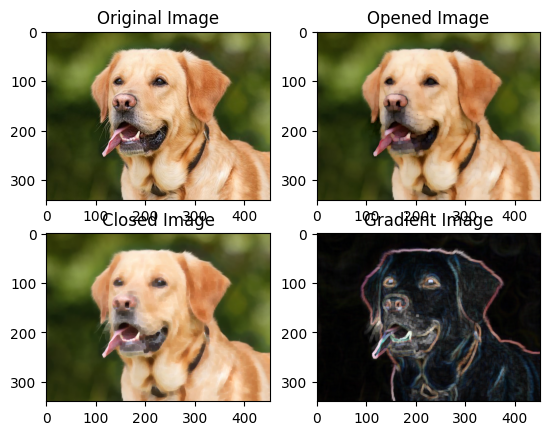

In [9]:
# Image opening, closing and morphological gradient
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

titles = ['Original Image', 'Opened Image', 'Closed Image', 'Gradient Image']
images = [image, opening, closing, gradient]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i])
 
plt.show()